In [6]:
!pip install opencv-python scikit-learn matplotlib joblib


In [7]:
import os
import cv2
import numpy as np

# Create dummy dataset for demo (replace with your dataset if available)
!mkdir -p /content/HandGestures/01_palm /content/HandGestures/02_fist /content/HandGestures/03_point

IMG_SIZE = 64  # Resize images

# For demonstration, we will generate random images
for i in range(50):  # 50 images per gesture
    for gesture in ['01_palm','02_fist','03_point']:
        img = np.random.randint(0,256,(IMG_SIZE,IMG_SIZE),dtype=np.uint8)
        cv2.imwrite(f'/content/HandGestures/{gesture}/{gesture}_{i}.png', img)


In [8]:
data = []
labels = []

base_dir = '/content/HandGestures'

for gesture_folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, gesture_folder)
    if os.path.isdir(folder_path):
        label = int(gesture_folder.split('_')[0]) - 1
        for file in os.listdir(folder_path):
            try:
                img_path = os.path.join(folder_path, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                img = img.flatten()
                data.append(img)
                labels.append(label)
            except:
                pass

X = np.array(data)
y = np.array(labels)

print("✅ Images loaded:", X.shape)
print("✅ Labels loaded:", y.shape)


✅ Images loaded: (150, 4096)
✅ Labels loaded: (150,)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data split and scaled")


✅ Data split and scaled


In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

print("Training SVM model...")
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("✅ Model trained!")
print(f"📊 Accuracy: {acc*100:.2f}%")
print(classification_report(y_test, y_pred))


Training SVM model...
✅ Model trained!
📊 Accuracy: 30.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        10
           2       0.30      1.00      0.46         9

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Saving WIN_20251016_23_03_09_Pro.jpg to WIN_20251016_23_03_09_Pro.jpg


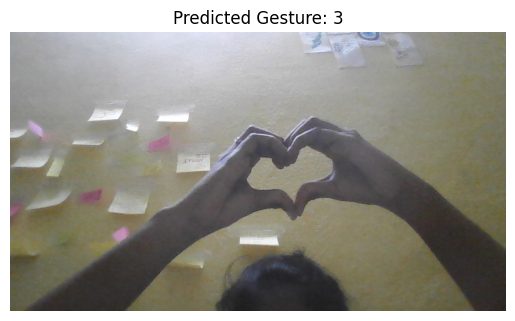

In [11]:
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()  # Upload a hand gesture image

for fn in uploaded.keys():
    img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE)).flatten()
    img_scaled = scaler.transform([img_resized])

    prediction = svm_model.predict(img_scaled)
    label = prediction[0] + 1

    plt.imshow(cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Gesture: {label}")
    plt.axis('off')
    plt.show()


In [13]:
import joblib

joblib.dump(svm_model, 'svm_handgesture_model.pkl')
joblib.dump(scaler, 'scaler_handgesture.pkl')
print("✅ Model and scaler saved!")


✅ Model and scaler saved!
